# 37 Delaunay Triangulation for Isoline Maps

Isolines can be extracted from meshes to represent the depth of a surface in the subsurface. However, the original mesh may not be available for usage anymore. In that case, it may be useful to recreate a quick representation of the original mesh using Delaunay Triangulation. 

<img src="../images/tutorial37_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/37_delaunay_triangulation_for_isoline_maps/'

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gemgis\gemgis.py:27: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="37_delaunay_triangulation_for_isoline_maps.zip", dirpath=file_path)

## Loading Data

The data used for GemGIS is obtained from the [Geological Survey NRW](#https://www.gd.nrw.de/). It will be used under Datenlizenz Deutschland – Namensnennung – Version 2.0 (https://www.govdata.de/dl-de/by-2-0) with © Geowissenschaftliche Daten: Untergrundmodell NRW (2020).

In [3]:
import geopandas as gpd

gdf = gpd.read_file(file_path + 'gg_kru_b_l_Z50m.shp')
gdf.head()

,OBJECTID,Z,EINHEIT,Shape_Leng,geometry
0,1.00,-2450,gg_kru_b_l_Z50m,3924.67,"LINESTRING (32403313.109 5785053.637, 32402917..."
1,2.00,-2400,gg_kru_b_l_Z50m,26332.90,"LINESTRING (32410198.859 5781110.785, 32409807..."
2,3.00,-2350,gg_kru_b_l_Z50m,31104.28,"LINESTRING (32409587.930 5780538.824, 32408824..."
3,4.00,-2300,gg_kru_b_l_Z50m,35631.73,"LINESTRING (32408977.008 5779966.863, 32408808..."
4,5.00,-2250,gg_kru_b_l_Z50m,41702.52,"LINESTRING (32407319.922 5779788.672, 32407246..."


## Plotting the Data

The LineStrings of the GeoDataFrame can be plotted to illustrate the depth variations within the displayed basin.

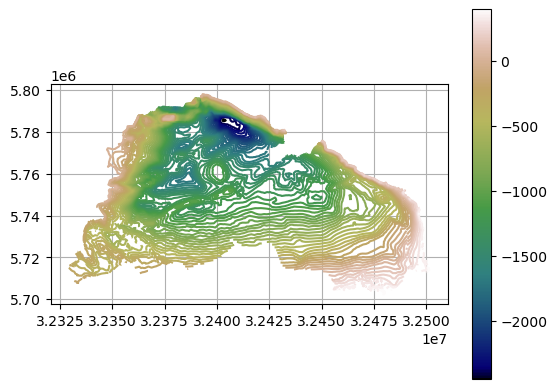

In [4]:
import matplotlib.pyplot as plt

gdf.plot(aspect='equal', column = 'Z', cmap = 'gist_earth', legend=True)
plt.grid()

## Create Mesh using Delaunay Triangulation

A PyVista PolyData object can be created using ``create_delaunay_mesh_from_gdf(..)``. 

In [5]:
mesh = gg.visualization.create_delaunay_mesh_from_gdf(gdf=gdf)
mesh

PolyData (0x25ab3ceba00)
  N Cells:	45651
  N Points:	23009
  N Strips:	0
  X Bounds:	3.233e+07, 3.250e+07
  Y Bounds:	5.702e+06, 5.798e+06
  Z Bounds:	-2.450e+03, 4.000e+02
  N Arrays:	1

## Plotting the mesh

The created PolyData object can be plotted using PyVista.

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


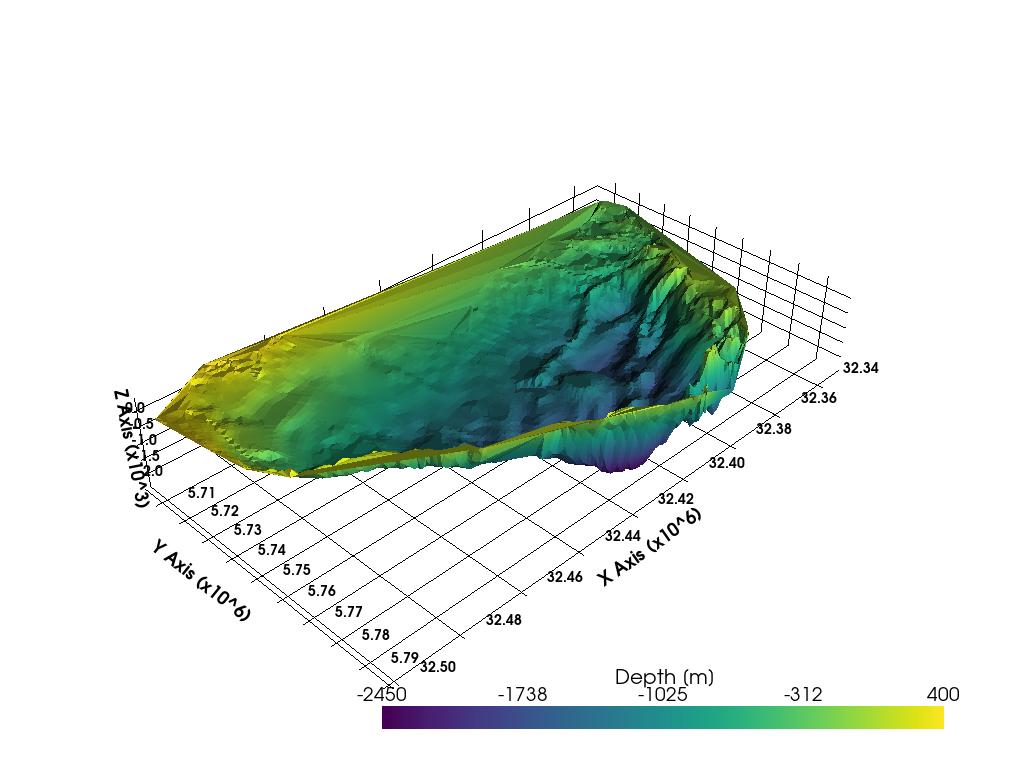

In [6]:
import pyvista as pv

sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(mesh, scalars='Depth [m]', scalar_bar_args=sargs,)

p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,10)
p.show()

## Creating Mesh with PyVista

A triangulated surface can also be created using the built-in ``delaunay_2d()`` function of PyVista. See also https://docs.pyvista.org/examples/00-load/create-tri-surface.html. 

In [7]:
gdf_xyz = gg.vector.extract_xy(gdf=gdf)
gdf_xyz

,OBJECTID,Z,EINHEIT,Shape_Leng,geometry,X,Y
0,1.00,-2450.00,gg_kru_b_l_Z50m,3924.67,POINT (32403313.109 5785053.637),32403313.11,5785053.64
1,1.00,-2450.00,gg_kru_b_l_Z50m,3924.67,POINT (32402917.820 5785157.270),32402917.82,5785157.27
2,1.00,-2450.00,gg_kru_b_l_Z50m,3924.67,POINT (32402585.375 5785498.707),32402585.38,5785498.71
3,1.00,-2450.00,gg_kru_b_l_Z50m,3924.67,POINT (32402870.727 5785657.359),32402870.73,5785657.36
4,1.00,-2450.00,gg_kru_b_l_Z50m,3924.67,POINT (32403086.758 5786086.730),32403086.76,5786086.73
...,...,...,...,...,...,...,...
23004,733.00,400.00,gg_kru_b_l_Z50m,153.94,POINT (32474651.758 5704841.910),32474651.76,5704841.91
23005,733.00,400.00,gg_kru_b_l_Z50m,153.94,POINT (32474603.586 5704848.586),32474603.59,5704848.59
23006,733.00,400.00,gg_kru_b_l_Z50m,153.94,POINT (32474597.918 5704823.645),32474597.92,5704823.64
23007,734.00,400.00,gg_kru_b_l_Z50m,94.02,POINT (32479877.676 5703950.059),32479877.68,5703950.06


In [8]:
import pyvista as pv
poly = pv.PolyData(gdf_xyz[['X', 'Y', 'Z']].values)
poly

PolyData,Information
N Cells,23009
N Points,23009
N Strips,0
X Bounds,"3.233e+07, 3.250e+07"
Y Bounds,"5.702e+06, 5.798e+06"
Z Bounds,"-2.450e+03, 4.000e+02"
N Arrays,0


In [9]:
surf = poly.delaunay_2d()
surf

PolyData,Information
N Cells,45536
N Points,23009
N Strips,0
X Bounds,"3.233e+07, 3.250e+07"
Y Bounds,"5.702e+06, 5.798e+06"
Z Bounds,"-2.450e+03, 4.000e+02"
N Arrays,0


In [10]:
surf ['Depth [m]'] = gdf_xyz['Z'].values

In [11]:
surf.save(file_path + 'surf.vtk')

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


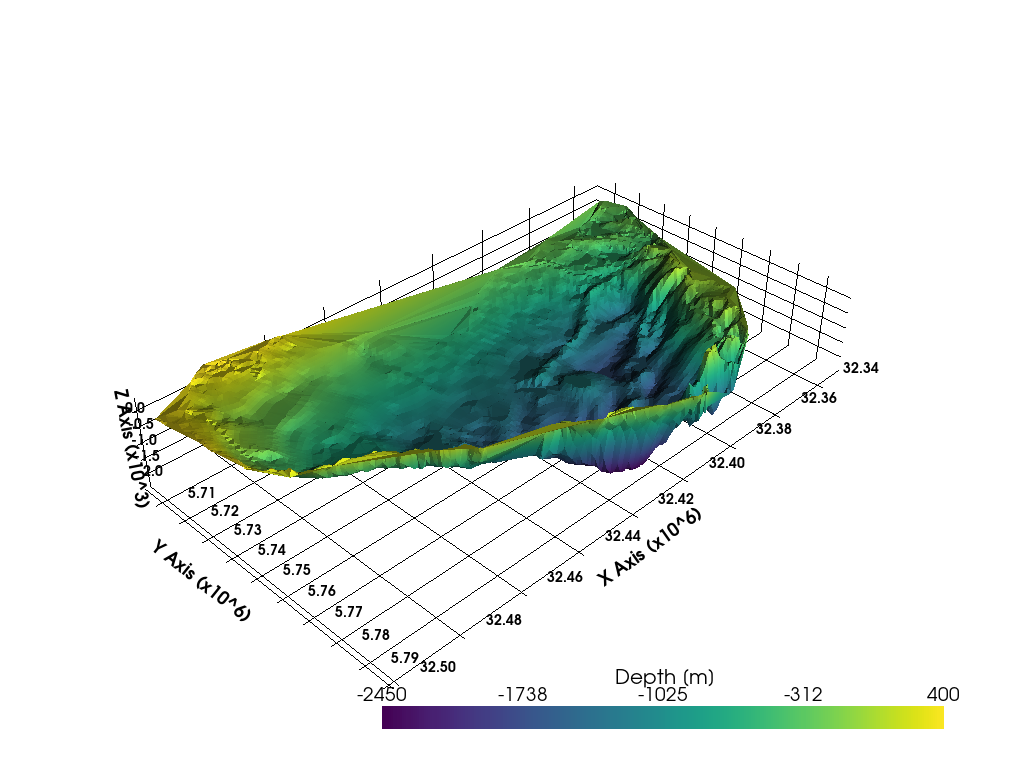

In [12]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(surf, scalars='Depth [m]', scalar_bar_args=sargs)

p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,10)
p.show()

### Creating Contour Lines

In [13]:
import numpy as np
contours = surf.contour(isosurfaces=np.arange(-2450, 400,50))
contours

PolyData (0x25ab3cadc00)
  N Cells:	36337
  N Points:	36178
  N Strips:	0
  X Bounds:	3.233e+07, 3.250e+07
  Y Bounds:	5.704e+06, 5.798e+06
  Z Bounds:	-2.400e+03, 3.500e+02
  N Arrays:	1

In [14]:
from shapely.geometry import LineString

linestrings = []
number_of_previous_points=0

for i in range(contours.number_of_cells):

    index_to_find_length_of_line = i + number_of_previous_points
    
    number_of_points_of_line = contours.lines[index_to_find_length_of_line]
    
    values = [contours.lines[index_to_find_length_of_line+i+1] for i in range(number_of_points_of_line)]
    
    vertices = [contours.points[value] for value in values]
    
    number_of_previous_points = number_of_previous_points + number_of_points_of_line
    
    linestrings.append(LineString(np.array(vertices)))


linestrings[:10]

[<LINESTRING Z (32409587.93 5780538.824 -2350, 32410238.562 5780366.676 -2350)>,
 <LINESTRING Z (32407304.336 5777048.086 -2050, 32408334.289 5776648.801 -2050)>,
 <LINESTRING Z (32408748.977 5778005.047 -2200, 32409538.211 5777784.203 -2200)>,
 <LINESTRING Z (32403693.547 5786613.994 -2400, 32403174.859 5787003.531 -2400)>,
 <LINESTRING Z (32404738.664 5782672.48 -2350, 32405538.297 5782346.84 -2350)>,
 <LINESTRING Z (32404086.734 5783669.289 -2400, 32405073.039 5783625.348 -2400)>,
 <LINESTRING Z (32405876.141 5782105.867 -2350, 32406595.562 5781902.203 -2350)>,
 <LINESTRING Z (32403750.453 5783786.059 -2400, 32404086.734 5783669.289 -2400)>,
 <LINESTRING Z (32402643.008 5783912.356 -2400, 32403750.453 5783786.059 -2400)>,
 <LINESTRING Z (32402263.211 5784114.785 -2400, 32402643.008 5783912.356 -2400)>]

In [15]:
gdf_countours = gpd.GeoDataFrame(geometry=linestrings)
gdf_countours['Z'] = [list(gdf_countours.loc[i].geometry.coords)[0][2] for i in range(len(gdf_countours))]
gdf_countours

,geometry,Z
0,LINESTRING Z (32409587.930 5780538.824 -2350.0...,-2350.00
1,LINESTRING Z (32407304.336 5777048.086 -2050.0...,-2050.00
2,LINESTRING Z (32408748.977 5778005.047 -2200.0...,-2200.00
3,LINESTRING Z (32403693.547 5786613.994 -2400.0...,-2400.00
4,LINESTRING Z (32404738.664 5782672.480 -2350.0...,-2350.00
...,...,...
36332,LINESTRING Z (32472712.875 5705828.297 350.000...,350.00
36333,LINESTRING Z (32476371.684 5706520.105 350.000...,350.00
36334,LINESTRING Z (32476542.145 5706398.895 350.000...,350.00
36335,LINESTRING Z (32476538.465 5706556.277 350.000...,350.00


<AxesSubplot: >

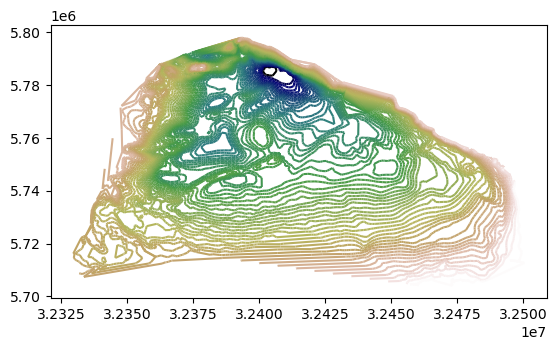

In [16]:
gdf_countours.plot(column='Z', cmap='gist_earth')

In [17]:
contours.save(file_path + 'contours.vtk')

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


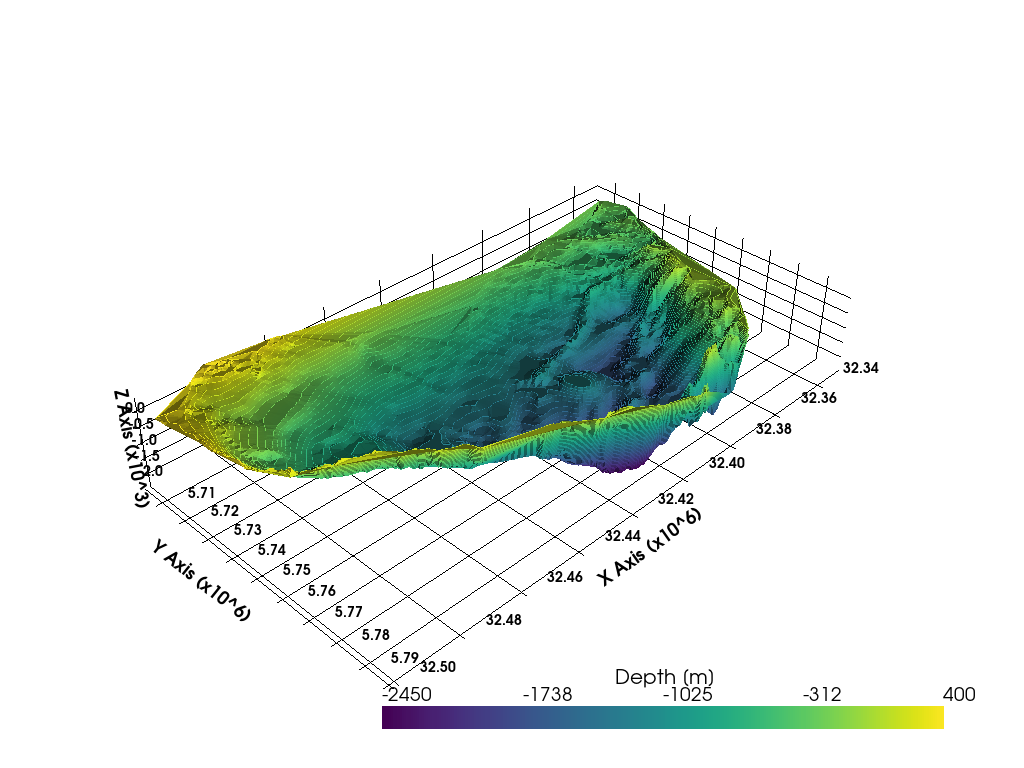

In [18]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(surf, scalars='Depth [m]', scalar_bar_args=sargs)
p.add_mesh(contours, scalars='Depth [m]', scalar_bar_args=sargs)
p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,10)
p.show()

## Merging Contour Lines

The single LineString elements can also be unified to larger LineStrings using ``unify_linestrings(..)``.

In [19]:
gdf = gg.vector.unify_linestrings(linestrings=gdf_countours)
gdf

,geometry,Z
0,LINESTRING Z (32331825.641 5708789.973 -200.00...,-200.00
1,LINESTRING Z (32334315.359 5723032.766 -250.00...,-250.00
2,LINESTRING Z (32332516.312 5722028.768 -250.00...,-250.00
3,LINESTRING Z (32332712.750 5721717.561 -250.00...,-250.00
4,LINESTRING Z (32332516.312 5722028.768 -250.00...,-250.00
...,...,...
628,LINESTRING Z (32480957.211 5755586.262 200.000...,200.00
629,LINESTRING Z (32488784.838 5750893.873 250.000...,250.00
630,LINESTRING Z (32489046.086 5750945.794 300.000...,300.00
631,LINESTRING Z (32490632.693 5749614.501 250.000...,250.00


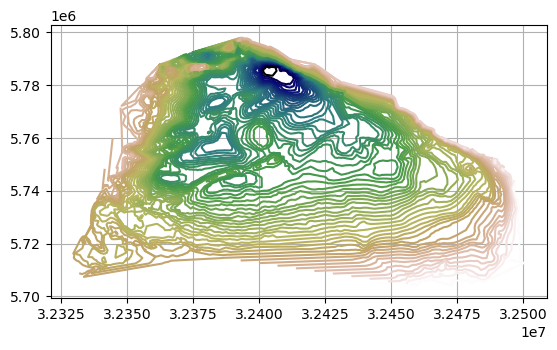

In [20]:
gdf.plot(column='Z', cmap='gist_earth')
plt.grid()